# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


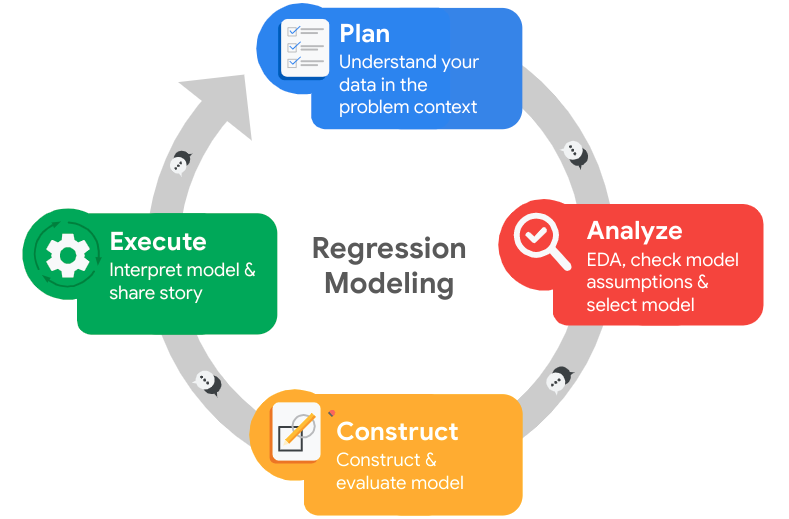

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [6]:
# Import packages
import pandas as pd

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [7]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [8]:
# Gather basic information about the data
### YOUR CODE HERE ###
# Gathering basic information about the dataset
df0_info = df0.info()
df0_description = df0.describe(include='all')

df0_info, df0_description


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


(None,
         satisfaction_level  last_evaluation  number_project  \
 count         14999.000000     14999.000000    14999.000000   
 unique                 NaN              NaN             NaN   
 top                    NaN              NaN             NaN   
 freq                   NaN              NaN             NaN   
 mean              0.612834         0.716102        3.803054   
 std               0.248631         0.171169        1.232592   
 min               0.090000         0.360000        2.000000   
 25%               0.440000         0.560000        3.000000   
 50%               0.640000         0.720000        4.000000   
 75%               0.820000         0.870000        5.000000   
 max               1.000000         1.000000        7.000000   
 
         average_montly_hours  time_spend_company  Work_accident          left  \
 count           14999.000000        14999.000000   14999.000000  14999.000000   
 unique                   NaN                 NaN          

### Gather descriptive statistics about the data

In [10]:
# Gathering descriptive statistics for the dataset, including all data types
descriptive_stats = df0.describe(include='all')

# Display the descriptive statistics
print(descriptive_stats)


        satisfaction_level  last_evaluation  number_project  \
count         14999.000000     14999.000000    14999.000000   
unique                 NaN              NaN             NaN   
top                    NaN              NaN             NaN   
freq                   NaN              NaN             NaN   
mean              0.612834         0.716102        3.803054   
std               0.248631         0.171169        1.232592   
min               0.090000         0.360000        2.000000   
25%               0.440000         0.560000        3.000000   
50%               0.640000         0.720000        4.000000   
75%               0.820000         0.870000        5.000000   
max               1.000000         1.000000        7.000000   

        average_montly_hours  time_spend_company  Work_accident          left  \
count           14999.000000        14999.000000   14999.000000  14999.000000   
unique                   NaN                 NaN            NaN           NaN   


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [11]:
# Display all column names
### YOUR CODE HERE ###
# Displaying the current column names
df0.columns.tolist()


['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'Department',
 'salary']

In [12]:
# Rename columns as needed
### YOUR CODE HERE ###


# Display all column names after the update
### YOUR CODE HERE ###
# Displaying all the updated column names
df0.columns.tolist()


['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'Department',
 'salary']

### Check missing values

Check for any missing values in the data.

In [13]:
# Check for missing values
### YOUR CODE HERE ###
# Checking for missing values in the dataset
missing_values = df0.isnull().sum()

# Displaying the count of missing values for each column
missing_values


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [14]:
# Check for duplicates
### YOUR CODE HERE ###
# Checking for duplicate rows in the dataset
duplicate_rows = df0.duplicated().sum()

# Display the count of duplicate rows
duplicate_rows


3008

In [15]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
# Displaying a sample of rows that have duplicates to inspect them
duplicate_rows_data = df0[df0.duplicated(keep=False)]

# Showing the first few rows of duplicates
duplicate_rows_data.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [16]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
# Dropping the duplicates and saving the resulting dataframe into a new variable
df_cleaned = df0.drop_duplicates()

# Checking the number of rows after removing duplicates
df_cleaned.shape


# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###


(11991, 10)

### Check outliers

Check for outliers in the data.

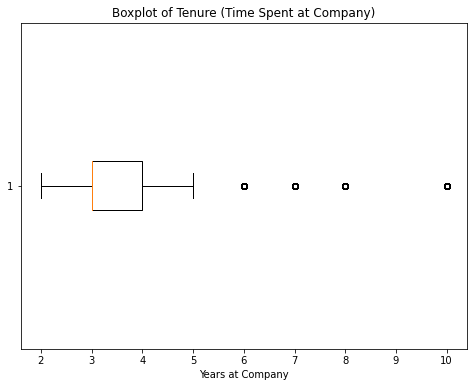

In [30]:
# Reverting the name of the column to the original one 'time_spend_company'
df_cleaned.rename(columns={'time_spent_company': 'time_spend_company'}, inplace=True)

# Creating the boxplot for 'time_spend_company' again
plt.figure(figsize=(8, 6))
plt.boxplot(df_cleaned['time_spend_company'], vert=False)
plt.title('Boxplot of Tenure (Time Spent at Company)')
plt.xlabel('Years at Company')
plt.show()





In [31]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

# Calculating the IQR for the 'time_spend_company' column
Q1 = df_cleaned['time_spend_company'].quantile(0.25)
Q3 = df_cleaned['time_spend_company'].quantile(0.75)
IQR = Q3 - Q1

# Defining the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying the rows with outliers
outliers = df_cleaned[(df_cleaned['time_spend_company'] < lower_bound) | (df_cleaned['time_spend_company'] > upper_bound)]

# Counting the number of rows with outliers
num_outliers = outliers.shape[0]

num_outliers


824

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [32]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
# Calculating the number of people who left vs. stayed
people_left_vs_stayed = df_cleaned['left'].value_counts()

# Calculating the percentage of people who left vs. stayed
people_left_vs_stayed_percentage = df_cleaned['left'].value_counts(normalize=True) * 100

# Displaying both the counts and percentages
people_left_vs_stayed, people_left_vs_stayed_percentage


(0    10000
 1     1991
 Name: left, dtype: int64,
 0    83.39588
 1    16.60412
 Name: left, dtype: float64)

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

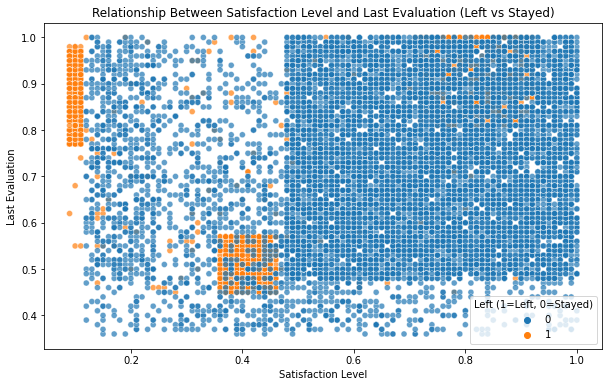

In [34]:
# Create a plot as needed
### YOUR CODE HERE ###
# Creating a scatter plot to visualize the relationship between satisfaction_level and last_evaluation
# for employees who left vs. those who stayed

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='satisfaction_level', y='last_evaluation', hue='left', alpha=0.7)
plt.title('Relationship Between Satisfaction Level and Last Evaluation (Left vs Stayed)')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.legend(title='Left (1=Left, 0=Stayed)')
plt.show()


In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###


In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###


In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###


In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###


In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###


In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###


In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###


### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.